In [1]:
Assignment_Number = '01'
Name = 'Pradyot Jain'
Student_ID = '48479985'

### Acknowledgement Statement by students:
**I acknowledge that I have only used GAITs (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions.** 

### Load the data

In [5]:
import pandas as pd #importing pandas for the assignment

In [7]:
# Reading the CSV file and checking the first 2 rows
customer = pd.read_csv('customer_shopping_data.csv')
customer.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [9]:
customer.shape # Finding out the total number of colomns and rows.

(99461, 10)

### Handling Missing Values

In [12]:
# Checking the info on the file
customer.info() # This is done to find out the missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99461 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99461 non-null  object 
 1   customer_id     99461 non-null  object 
 2   gender          99461 non-null  object 
 3   age             99461 non-null  int64  
 4   category        99461 non-null  object 
 5   quantity        99461 non-null  int64  
 6   price           99459 non-null  float64
 7   payment_method  99460 non-null  object 
 8   invoice_date    99461 non-null  object 
 9   shopping_mall   99461 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [14]:
# Check for missing value
missing_values = customer.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

price             2
payment_method    1
dtype: int64

In [16]:
# Filling missing values with the mean of the column.
customer['price'] = customer['price'].fillna(customer['price'].mean())
# Assuming that the missing value in the payment method should be cash as it is not recorded.
customer['payment_method'] = customer['payment_method'].fillna('Cash')
# Checking again for missing values
# Print the number of missing values in 'price' and 'payment_method'
print(f"Number of missing values in 'price': {customer['price'].isnull().sum()}")
print(f"Number of missing values in 'payment_method': {customer['payment_method'].isnull().sum()}")

Number of missing values in 'price': 0
Number of missing values in 'payment_method': 0


In [18]:
# Checking numbers of unique values in a column
customer.nunique()

invoice_no        99458
customer_id       99457
gender                3
age                  53
category             15
quantity              5
price                42
payment_method        6
invoice_date        812
shopping_mall        11
dtype: int64

In [20]:
# Checking for invalid customer ID
pattern = r'C\d{6}$'
customer['customer_id_valid'] = customer['customer_id'].astype(str).str.match(pattern).fillna(False).astype(bool)
print (customer[~customer['customer_id_valid']])

      invoice_no customer_id  gender  age   category  quantity  price  \
99418    I166977     C2061##  Female   34  Cosmetics         5  203.3   

      payment_method invoice_date shopping_mall  customer_id_valid  
99418    Credit Card        44597        Kanyon              False  


In [22]:
# Removing the above customer id as it will not affect our data...as the sample size is very big
customer = customer[customer['customer_id_valid']]
customer = customer.drop(columns=['customer_id_valid'])

In [24]:
customer.info() # This is done to check the removal

<class 'pandas.core.frame.DataFrame'>
Index: 99460 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99460 non-null  object 
 1   customer_id     99460 non-null  object 
 2   gender          99460 non-null  object 
 3   age             99460 non-null  int64  
 4   category        99460 non-null  object 
 5   quantity        99460 non-null  int64  
 6   price           99460 non-null  float64
 7   payment_method  99460 non-null  object 
 8   invoice_date    99460 non-null  object 
 9   shopping_mall   99460 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.3+ MB


### Data Type Conversion

In [27]:
print(customer.columns) # To check the unique columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [29]:
# Check for data types
print("Datatype of invoice_date:",customer['invoice_date'].dtypes)

Datatype of invoice_date: object


In [31]:
# Replace 'invoice_date' with the actual name of the date column
# Also replacing some invalid dates to NaT.
customer['invoice_date'] = pd.to_datetime(customer['invoice_date'], errors='coerce')

# Checking whether the conversion was successful.
customer['invoice_date'].head()

0   2022-08-05
1   2021-12-12
2   2021-11-09
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

In [33]:
# Checking for the missing dates or null.
missing_dates = customer['invoice_date'].isnull().sum()
print(f"Missing dates after conversion: {missing_dates}")


Missing dates after conversion: 15


In [35]:
# Checking the datatype after conversion
print("Datatype of invoice_date:",customer['invoice_date'].dtypes)

Datatype of invoice_date: datetime64[ns]


### Duplicate Records

In [38]:
# Checking duplicates on the basis of invoice_no and customer_id
duplicates = customer[customer.duplicated(subset = ['invoice_no','customer_id'], keep = False)]
duplicates

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
236,I218385,C290280,Female,51,Toys,1,35.84,Cash,NaT,Metrocity
237,I218385,C290280,Female,51,Toys,1,35.84,Cash,2022-07-19,Metrocity
249,I120948,C340089,Female,54,Shoe,4,2400.68,Debit Card,NaT,Mall of Istanbul
250,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,2021-08-08,Mall of Istanbul
99389,I170876,C320288,Male,40,Food,3,15.69,Cash,NaT,Metrocity
99390,I170876,C320288,Male,40,Food & Beverage,3,15.69,Cash,2022-08-14,Metrocity


### Handling Duplicates and Null Values

In [41]:
# Droping duplicates
customer = customer.drop_duplicates(subset = ['invoice_no','customer_id'])

In [43]:
# Dropping null values because the data is huge...it will not affect the analysis.
customer = customer.dropna()

# Verifing null values are removed 
customer.shape

(99442, 10)

### Similar Records

In [46]:
# Replacing similar names with common names
# I checked these on an Excel file by using the filter.
# Using .loc because it was showing an error before because of the version (I find the solution on chatGPT)
customer.loc[:, 'payment_method'] = customer['payment_method'].replace('Cash Cash', 'Cash')
customer.loc[:, 'payment_method'] = customer['payment_method'].replace('CreditCard', 'Credit Card')
customer.loc[:, 'gender'] = customer['gender'].replace('Mal', 'Male')
customer.loc[:, 'shopping_mall'] = customer['shopping_mall'].replace('Mall Istanbul', 'Mall of Istanbul')

In [48]:
# Define a dictionary with the replacements
replacements = {'Toy': 'Toys','Clothi': 'Clothing','Boks': 'Books','Cosmetic': 'Cosmetics','Food': 'Food & Beverage','Shoe': 'Shoes','Tech': 'Technology'}

# Replace the values in the 'categories' column
customer.loc[:, 'category'] = customer['category'].replace(replacements)
customer.head(2) # Display the updated DataFrame

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul


In [50]:
customer['category'].unique() #Checking after replacing

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

### Data Distribution

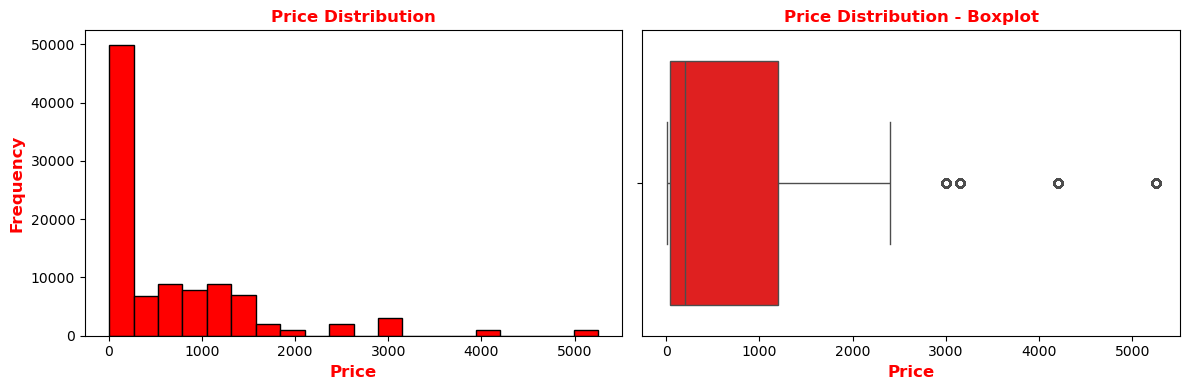

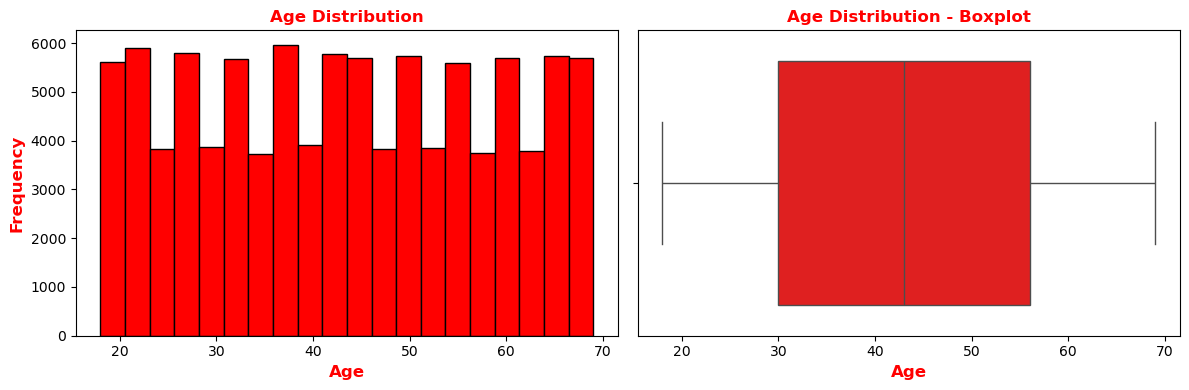

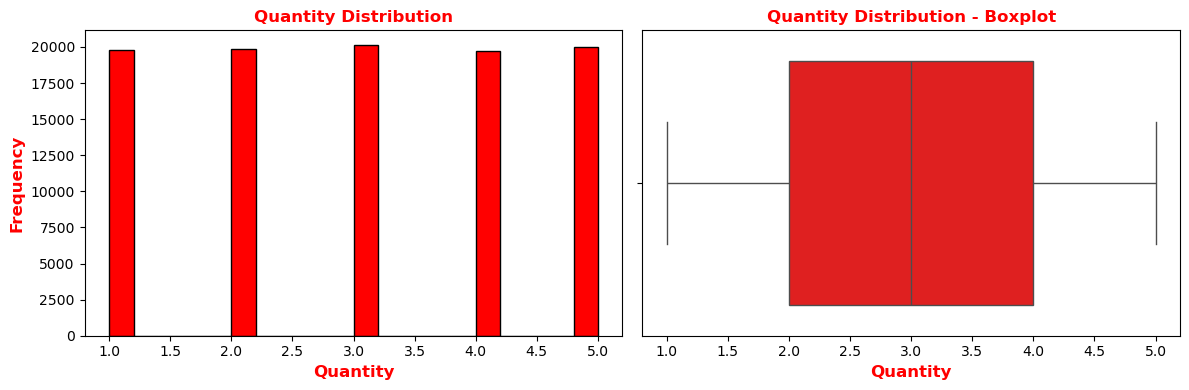

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
#This is done to check for outliers and skewness. 
numerical_column = ['price', 'age', 'quantity']

for column in numerical_column:
    # Create subplots: 1 row, 2 columns for each iteration
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the fig size as needed

    # Histogram on the first subplot (left)
    axes[0].grid(False)
    axes[0].hist(customer[column], bins=20, edgecolor='black', color='red')
    axes[0].set_title(f'{column.capitalize()} Distribution',fontsize=12, fontweight='bold', color='red')
    axes[0].set_xlabel(column.capitalize(),fontsize=12, fontweight='bold', color='red')
    axes[0].set_ylabel('Frequency',fontsize=12, fontweight='bold', color='red')

    # Boxplot on the second subplot (right)
    sns.boxplot(x=customer[column], color='red', ax=axes[1])
    axes[1].set_title(f'{column.capitalize()} Distribution - Boxplot',fontsize=12, fontweight='bold', color='red')
    axes[1].set_xlabel(column.capitalize(),fontsize=12, fontweight='bold', color='red')
    
    # Display the plots
    plt.tight_layout()  # Adjust spacing to prevent overlap
    plt.show()

**Explanation:** The graph of age is different because I have removed the invalid values in the invoice date, which were 15 entries, and because of that, there is no outlier in age either. There are no outliers in quantity, but there are outliers in price. The price distribution is positively skewed as it is rightwards.

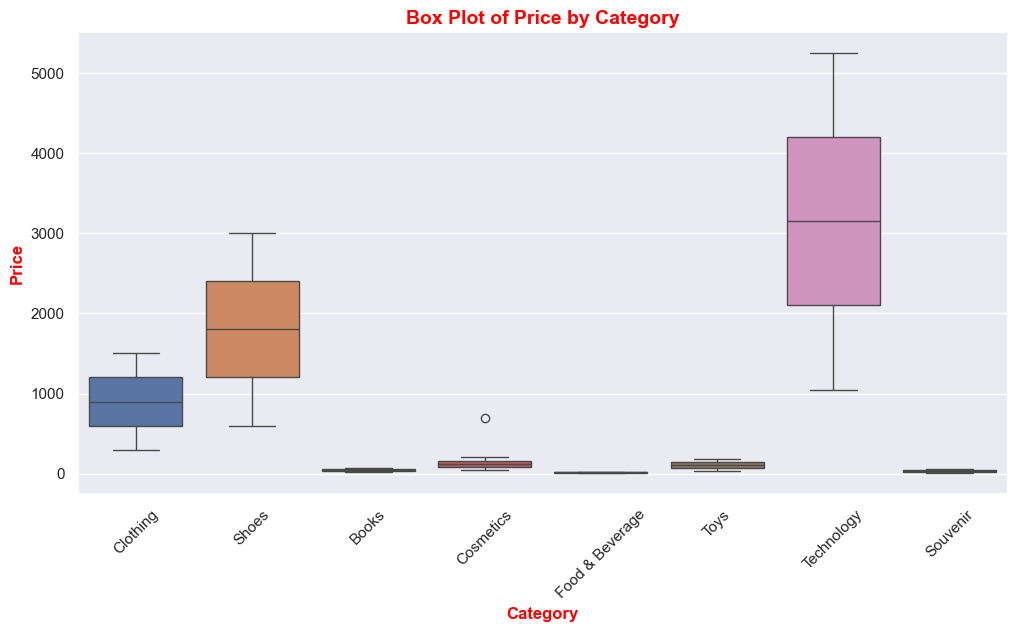

In [56]:
# Plot box plot for each category
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.boxplot(x='category', y='price', data=customer, hue = 'category')
plt.title('Box Plot of Price by Category',fontsize=14, fontweight='bold', color='red')
plt.xlabel('Category',fontsize=12, fontweight='bold', color='red')
plt.ylabel('Price',fontsize=12, fontweight='bold', color='red')
plt.xticks(rotation=45)
plt.show()

**Explanation:** We can see that there are no outliers if we group the price category wise.

### Outliers

In [60]:
import numpy as np
# Detecting outliers using the IQR method
Q1 = customer[['age', 'quantity', 'price']].quantile(0.25)
Q3 = customer[['age', 'quantity', 'price']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((customer[['age', 'quantity', 'price']] < (Q1 - 1.5 * IQR)) |
            (customer[['age', 'quantity', 'price']] > (Q3 + 1.5 * IQR)))

outliers_summary = outliers.sum()
outliers_summary

age            0
quantity       0
price       5024
dtype: int64

In [62]:
# Calculate Q1, Q3, and IQR for price by categories
Q1 = customer.groupby('category')['price'].quantile(0.25)
Q3 = customer.groupby('category')['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each category
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Function to check if a price is an outlier in a particular category
def is_outlier(row):
    category = row['category']
    return (row['price'] < lower_bound[category]) or (row['price'] > upper_bound[category])

# Apply the function to determine outliers
customer.loc[:,'is_outlier'] = customer.apply(is_outlier, axis=1)
outliers = customer[customer['is_outlier']]# Display rows where price is an outlier

In [64]:
outliers.head()# Show the outliers

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,is_outlier
64,I218590,C224743,Female,29,Cosmetics,4,689.253423,Debit Card,2022-05-09,Metropol AVM,True


**Explanation:** There are no outliers in price if we check it category-wise except 1 which is in cosmetics, which can be ignored as the data is huge and will not affect it. We see lots of outliers in price if we check it as a whole because the price of the product in the technology category is higher than in other categories.

## Skewness

In [68]:
# Calculating price skewness
price_skewness = customer['price'].skew()
print(f'Price Skewness: {price_skewness}')

Price Skewness: 2.2474442516774404


**Explanation:** Since the price skewness is nearer to 2.5, it indicates a strong positive skew, meaning that while most prices are low, there are a few very high prices that pull the tail to the right.

In [71]:
# Fixing Price Skewness with the help of log transformation.
# Apply log transformation to reduce skewness
customer.loc[:,'price_log'] = np.log(customer['price'] + 1)  # Adding 1 to avoid log(0)

# Check the skewness after transformation
price_log_skewness = customer['price_log'].skew()
print("Skewness of 'price_log':", price_log_skewness)


Skewness of 'price_log': -0.232666634212134


**Explanation:** After the transformation we made the price data negatively skewed but it is now nearer to 0, so we have made the data somewhat symmetrical.

In [74]:
# Calculating Quantity skewness 
quantity_skewness = customer['quantity'].skew()
print(f'Quantity Skewness: {quantity_skewness}')

Quantity Skewness: -0.001281872870941698


**Explanation:** Since the Quantity skewness is near to 0, the data is almost symmetrical.

### Overall Summary
- **Missing Values:** All missing values were successfully handled. The price column had 2 missing values filled with the mean, and the payment_method column had 1 missing value filled with the cash. No missing values remain in the dataset. Also, there was one invalid customer ID, which was removed.

- **Data Type Conversion:** The invoice_date column was successfully converted to the datetime64[ns] format.

- **Handling Duplicates and Null Values:** There were 3 duplicate records and 15 null values removed because it's huge data, and removing it will not affect our analysis.

- **Data Distribution:** It was done based on histograms and Boxplots.

- **Outliers:** The following outliers were detected detected:  **Age:** No outlier, **Quantity:** No outliers,**Price:** 5,024 outliers. If we check the outlier of the price category-wise, we will not find any outlier. So I have not removed the outliers.
               
- **Skewness:** There was skewness in Price, which was fixed with the help of log transformation. There is no skewness in quantity. 

## Section 2:

### Definition

**Spending Score:** It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

**The spending score and price are same so we can use either of them for creating the graph. I am using price for the graph**

### 1. Box Plot: Spending Scores by Gender

#### Create a box plot to compare the distribution of spending scores between male and female customers. What can you infer from the box plot about the spending behaviour of different genders?


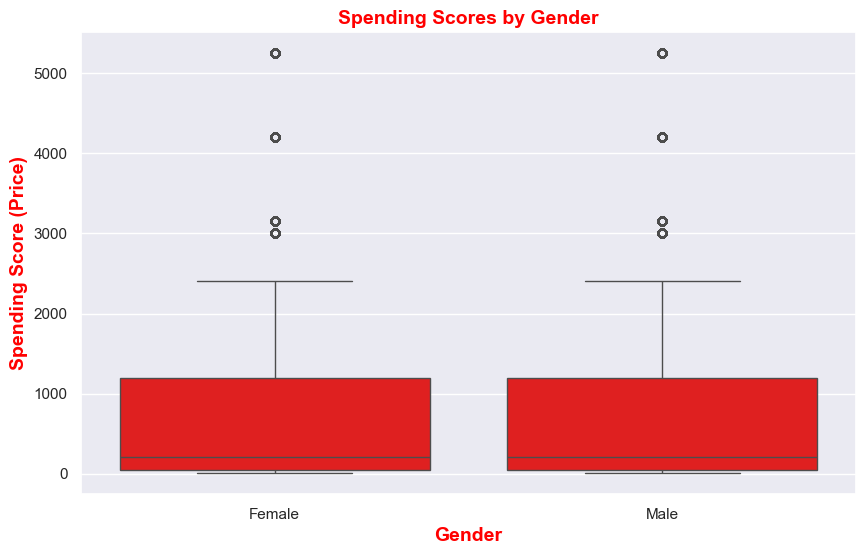

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for spending score by gender
plt.figure(figsize=(10, 6))
sns.set_theme()
sns.boxplot(x='gender', y='price', data=customer, color = 'red')
plt.title('Spending Scores by Gender',fontsize=14, fontweight='bold', color='red')
plt.xlabel('Gender',fontsize=14, fontweight='bold', color='red')
plt.ylabel('Spending Score (Price)',fontsize=14, fontweight='bold', color='red')
plt.show()

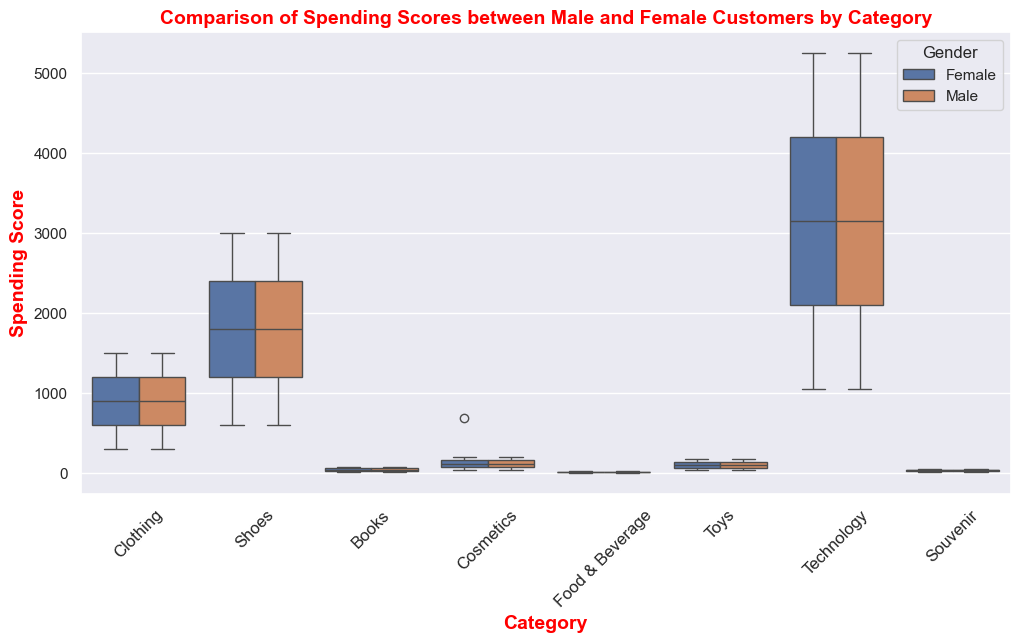

In [84]:
# Create a box plot comparing spending scores by gender within each category
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.boxplot(x='category', y='price', hue='gender', data=customer)
plt.title('Comparison of Spending Scores between Male and Female Customers by Category',fontsize=14, fontweight='bold', color='red')
plt.xlabel('Category',fontsize=14, fontweight='bold', color='red')
plt.ylabel('Spending Score',fontsize=14, fontweight='bold', color='red')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender')
plt.show()

### Insight: 
From the box plot, we can infer the following about the spending behavior of different genders:
- Men and women have nearly comparable median expenditure ratings. This implies that, on average, both genders spend nearly equal amounts.
-  Both genders have a comparable interquartile range (IQR), the middle 50% of expenditure scores. This suggests that the spending variability between male and female clients is similar.
-  Some clients, regardless of gender, spend much more than the average. These outliers indicate that certain consumers, regardless of gender, are high-spending
- Gender may not have a significant role in predicting spending behavior according to the comparable distribution of scores across genders. Other characteristics, such as age, product category, or shopping frequency, may have a larger influence.
- When we make the graph category-wise, we see no outliers, except cosmetics have only 1 outlier, which is also in a female, which can be ignored.
### Conclusion:
Both genders exhibit comparable spending behaviors. When attempting to identify high-spending clients, marketing techniques should include other factors in addition to gender. There are outliers in **'Spending Score By Gender'** because the products in the technology category are way more expensive than other categories.

### 2. Scatter Plot: Age vs. Spending
#### Create a scatter plot to visualise the relationship between age and spending. What insights can you derive from this visualization? Is there a correlation between age and spending?


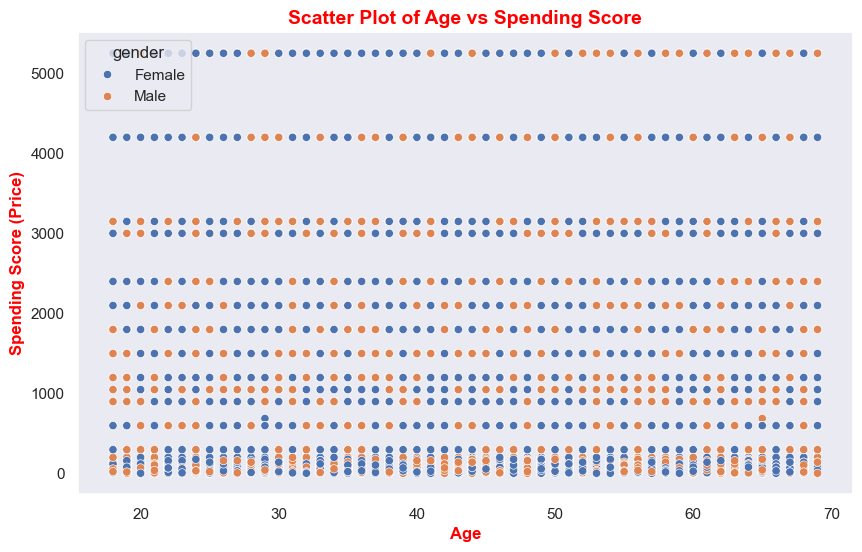

In [88]:
# Create a scatter plot for age vs. spending
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
sns.scatterplot(x='age', y='price',hue='gender', data=customer)
plt.title('Scatter Plot of Age vs Spending Score',fontsize=14, fontweight='bold', color='red')
plt.xlabel('Age',fontsize=12, fontweight='bold', color='red')
plt.ylabel('Spending Score (Price)',fontsize=12, fontweight='bold', color='red')
plt.show()

### Insights:
- The figure reveals a uniform distribution of spending scores across different ages, indicating no substantial relationship between a customer's age and how much they spend.
- High expenditure scores (about 5000) are seen throughout a wide age span, from early twenties to late sixties. This suggests that high-spending clients exist across all age groups.- 
Spending scores tend to cluster around specific values (e.g., 1000, 2000, 3000). This might imply that particular items or services are priced in a way that leads to similar spending levels regardless of gender.
- The scatter plot employs various colors to differentiate between male and female clients. The pattern of expenditure throughout age groups is comparable for both genders, indicating that gender does not appear to have a substantial impact on spending across different age ranges.
- Age does not affect the spending score of the individual.
### Conclusion:
Because high spending happens across all age groups and genders, marketing initiatives should not target a specific age group or gender. Instead, focusing on certain items or services that are popular among various age groups may be more beneficial. The clusters surrounding particular expenditure scores indicate that certain price points are more prevalent. Understanding why customers cluster around certain spending levels might help guide pricing initiatives.

In [91]:
# Calculate the correlation between age and spending
correlation = customer['age'].corr(customer['price'])
print(f"Correlation between Age and Spending Score: {correlation:.2f}")

Correlation between Age and Spending Score: 0.00


**No there is no correlation between Age and Price**

### 3. Customer Segmentation by Age Groups
#### Segment the customers into different age groups (e.g., 18-25, 26-35, 36-45, 46-55, 56+). How does the spending score vary across these age groups? Provide a visualisation to support your analysis.


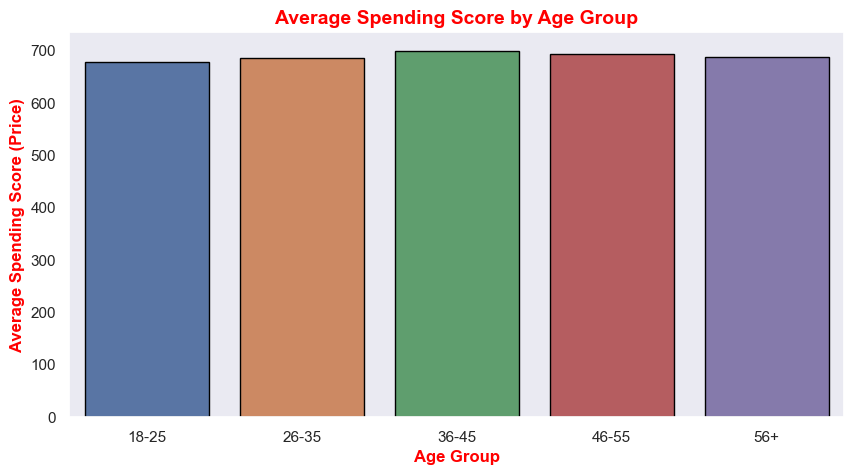

In [95]:
# Define age groups
age_bins = [18, 25, 35, 45, 55, customer['age'].max()]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']
customer.loc[:, 'age_group'] = pd.cut(customer['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average spending score by age group
age_group_spending = customer.groupby('age_group', observed=True)['price'].mean().reset_index()

# Visualize the spending score across age groups
plt.figure(figsize=(10, 5))
sns.barplot(x='age_group', y='price', data=age_group_spending , hue = 'age_group', edgecolor = 'black')
plt.title('Average Spending Score by Age Group',fontsize=14, fontweight='bold', color='red')
plt.xlabel('Age Group',fontsize=12, fontweight='bold', color='red')
plt.ylabel('Average Spending Score (Price)',fontsize=12, fontweight='bold', color='red')
plt.grid(False)
plt.show()

In [97]:
print(age_group_spending)# Display the age group spending data

  age_group       price
0     18-25  678.801559
1     26-35  686.093516
2     36-45  700.261214
3     46-55  693.243982
4       56+  687.936716


### Insight:
- All the age groups have similar spending habits.
- The age group from 36 to 45 spends relatively higher on average than other age groups, this could be due to higher income levels.
- The lowest average spending score is of the individuals from 18 to 25 years, this could be due to low income level, many are not working and still studying, etc.
### Conclusion:
Middle-aged adults are the most lucrative market segment. Marketing efforts could be tailored to this demographic, focusing on their preferences and needs. The business might consider different strategies to engage younger customers, such as offering discounts, promotions, or products that appeal to their lifestyle. Age might not be a strong factor in influencing spending behavior, and other factors (e.g., gender, and payment method) might need to be considered for targeted marketing.

### Question: Based on your analysis, which customer segments/categories should the shopping mall target for marketing campaigns?


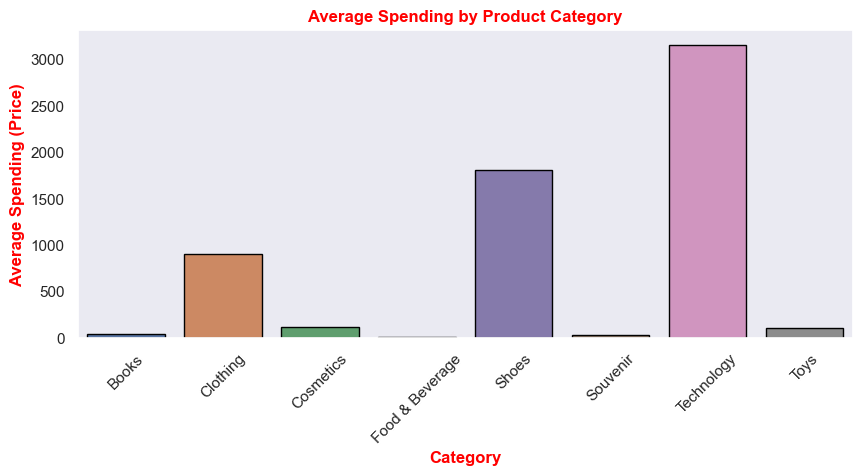

,category,price
0,Books,45.562583
1,Clothing,901.077928
2,Cosmetics,122.478187
3,Food & Beverage,15.671237
4,Shoes,1807.330114
5,Souvenir,34.894345
6,Technology,3157.357357
7,Toys,107.740379


In [101]:
# Calculate average spending by category
category_avg_spending = customer.groupby('category')['price'].mean().reset_index()

# Visualize average spending by category
plt.figure(figsize=(10, 4))
sns.set_theme(style='dark')
sns.barplot(x='category', y='price', data=category_avg_spending, hue='category', edgecolor='black')
plt.title('Average Spending by Product Category',fontsize=12, fontweight='bold', color='red')
plt.xlabel('Category',fontsize=12, fontweight='bold', color='red')
plt.ylabel('Average Spending (Price)',fontsize=12, fontweight='bold', color='red')
plt.xticks(rotation=45)
plt.show()
category_avg_spending

The shopping center should focus its marketing activities on the following customer segments/categories, according to the analysis shown in the bar graph:
- Technology is the highest average spending category followed by shoes and clothing. The mall should focus on promoting these categories as they likely contribute significantly to the mall's overall revenue. They can give limited-time deals, promote new technology, etc.
- Other categories apart from the top 3 categories should not be ignored. Campaigns for these segments can include buying one get one free, bundling deals, discounted prices, etc.
- Effective marketing strategies could include personalized promotions, targeted ads, and exclusive deals or events.
- Malls should give personalized offers to high-spending customers for retention purposes.
- Malls can start loyalty programs to attract more customers and increase their revenue.

## Section 3

### Sales by Payment Method
#### Create a visualisation to visualize the proportion of total sales made by each payment_method. What can you infer from this visualisation about customer preferences for payment methods?

In [106]:
# Group by payment method and calculate total sales for each
sales_by_payment = customer.groupby('payment_method')['price'].sum()

# Format the total sales for each payment method
sales_by_payment_formatted = sales_by_payment.apply(lambda x: f"${x:,.2f}")
print(sales_by_payment_formatted)# Display the formatted result

payment_method
Cash           $30,701,943.08
Credit Card    $24,051,124.27
Debit Card     $13,791,600.34
Name: price, dtype: object


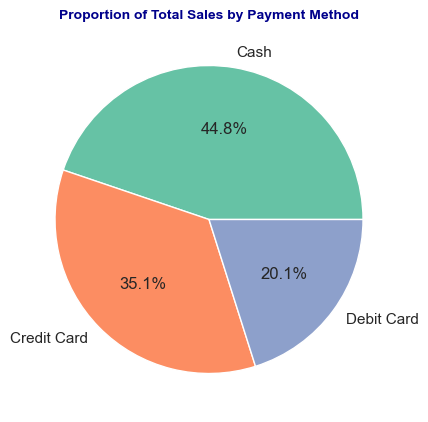

In [108]:
# Create a pie chart to visualize the proportion of total sales by payment method
plt.figure(figsize=(8, 5))
sales_by_payment.plot(kind='pie',autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proportion of Total Sales by Payment Method',fontsize=10, fontweight='bold', color='darkblue')
plt.ylabel('')  # Hide the y-label
plt.show()

### Observation:

- Cash is the most preferred payment amongst customer as it accounts for 44.8% of total sales.
- Second most preferred payment method is Credit Card which is 35.1% of total sales.
- Debit Card also account for significant portion for total sales which is 20.1% but it is the least preferred payment method.

### Overall Insight:
The distribution suggests that while cash remains the dominant method of payment, non-cash methods (Credit Card and Debit Card) are also widely used, together making up over half of the total sales (55.2%). The fairly even distribution between cash and non-cash methods implies that the customer base is diverse in its payment preferences.

### Sales Trend Over Time
#### Create a line chart to visualize the total monthly sales over the period covered by the dataset. Provide insights into any trends or patterns you observe.


In [112]:
# Creating new column to store month and year
customer.loc[:, 'month_year'] = customer['invoice_date'].dt.to_period('M')

In [114]:
# Group by month and year, and calculate total monthly sales
monthly_sales = customer.groupby('month_year')['price'].sum()
monthly_sales.head()

month_year
2021-01    2655372.78
2021-02    2358636.34
2021-03    2618434.14
2021-04    2558825.62
2021-05    2662343.78
Freq: M, Name: price, dtype: float64

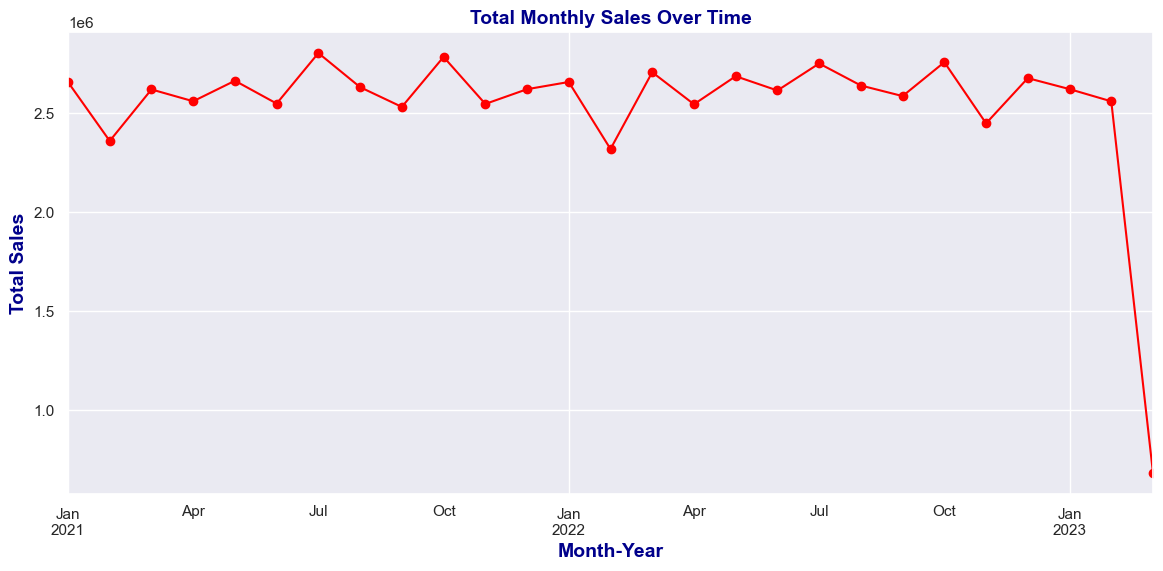

In [116]:
# Create a line chart to visualize the total monthly sales
plt.figure(figsize=(14, 6))
sns.set(style ='darkgrid')
monthly_sales.plot(kind='line', marker='o', color='red')
plt.title('Total Monthly Sales Over Time',fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Month-Year',fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Total Sales',fontsize=14, fontweight='bold', color='darkblue')
plt.grid(True)
plt.show()

### Insight:

- Total monthly sales are reasonably steady throughout the time, fluctuating at a regular amount. Most months, overall sales range between 2.4 and 3 million units.
- The sales data shows some periodic dips and peaks, indicating a potential cyclic or seasonal tendency. For example, you can see a few noteworthy reductions in sales followed by recoveries, indicating potential seasonal slowdowns or sales campaigns at specific periods of the year.
- Sales decline significantly after the cycle, particularly in late 2022 and early 2023. This fast fall might suggest a market downturn, product supply issues, changes in customer behavior, or other external reasons influencing sales.
- There is a repeating decrease around December, followed by a recovery in January, which might reflect seasonal variables such as less spending over the holidays and more purchases in the new year.
- The significant drop at the end of the period may need further investigation. It could be related to external factors or there was no data after Jan 2023.

## Recommendation:
The key recommendation I will provide to business is that:
- Mall should focus on high-spending customers, and offer them tailored promotions, discounts, loyalty programs, and premium products.
- They should engage young customers by offering them affordable, trendy products and student discounts.
- They can save money by advertising to all genders as the spending scores of both genders are similar.
- Provide VIP services and loyalty programs to high-spending customers to retain them and encourage them to repeat business.
- To improve marketing effectiveness, segment customers and build targeted campaigns based on their purchasing habits and demographics.
- Monitor and Adjust: Review data regularly to modify tactics and ensure that marketing activities are still in line with consumer behavior and preferences.

By implementing these recommendations, the business can improve its marketing efforts, enhance consumer engagement, and boost revenues.  

##                                                  ---------------------------THANK YOU---------------------------